### Simultaneous write and read


We want to watch the loss curves in a jupyter notebook to see the progress.

In [1]:
from pathlib import Path
from time import sleep

import numpy as np
import matplotlib.pyplot as plt

import datamate

root_dir = Path(".") / 'data'
datamate.set_root_dir(root_dir)

In [2]:
# To view the filesystem tree:
datamate.Directory(datamate.get_root_dir())

data/ - Last modified: February 28, 2023 01:46:59
├── CellMeasurements_0000/
│   ├── _meta.yaml
│   ├── cell_id.h5
│   ├── colors.h5
│   ├── connections/
│   │   ├── post_cell_id.h5
│   │   └── pre_cell_id.h5
│   ├── x.h5
│   └── y.h5
├── CellMeasurements_0001/
│   ├── _meta.yaml
│   ├── cell_id.h5
│   ├── colors.h5
│   ├── connections/
│   │   ├── post_cell_id.h5
│   │   └── pre_cell_id.h5
│   ├── x.h5
│   └── y.h5
├── Directory_0000/
│   ├── cell_id.h5
│   ├── colors.h5
│   ├── connections/
│   │   ├── post_cell_id.h5
│   │   └── pre_cell_id.h5
│   ├── x.h5
│   └── y.h5
├── TrainedNN_0000/
│   └── loss.h5
└── experiments_config/
    ├── measurements 1.h5
    └── measurements 2.h5

displaying: 9 directories, 23 files

In [3]:
# Now, we instantiate the running Folder.
tnn = datamate.Directory('TrainedNN_0000')

In [4]:
# And can access the loss, while the training keeps running.

def watch_loss(tnn):
    fig = plt.figure()
    ax = plt.subplot()
    ax.plot(tnn.loss[:])
    ax.set_xlabel("iteration")
    ax.set_ylabel("loss")

    def update_loss(loss):
        iters = np.arange(0, len(loss))
        ax.lines[0].set_data(iters, loss)
        if loss.any():
            ymax = np.max(loss)
            ymin = np.min(loss)
        ax.axis([0, iters[-1], ymin, ymax])

    while True:
        loss = tnn.loss[:]
        update_loss(loss)
        fig.canvas.draw()
        fig.canvas.flush_events()
        sleep(0.125)

<IPython.core.display.Javascript object>


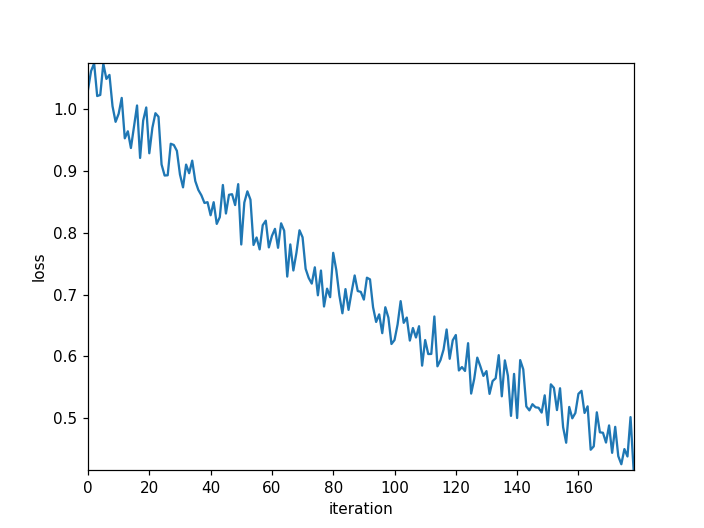

KeyboardInterrupt: 

In [5]:
%matplotlib notebook
watch_loss(tnn)